In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('/content/train.csv')

In [7]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [8]:
df.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [9]:
print(df[(df['price_range']==1)]['price_range'].count())

500


In [10]:
X=df[['battery_power','clock_speed','int_memory','ram','touch_screen','wifi']]

In [11]:
X.shape


(2000, 6)

In [12]:
Y=df[['price_range']]

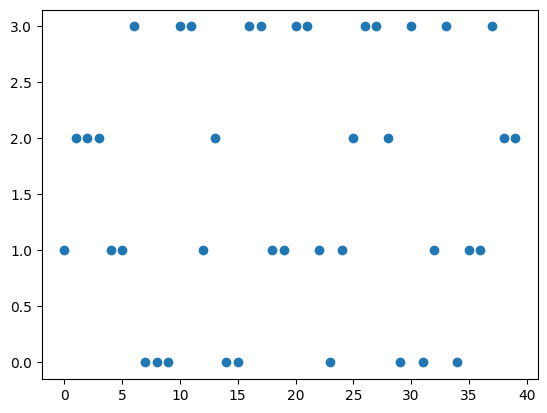

In [15]:
x=[i for i in range(40)]
plt.scatter(x,Y[0:40])

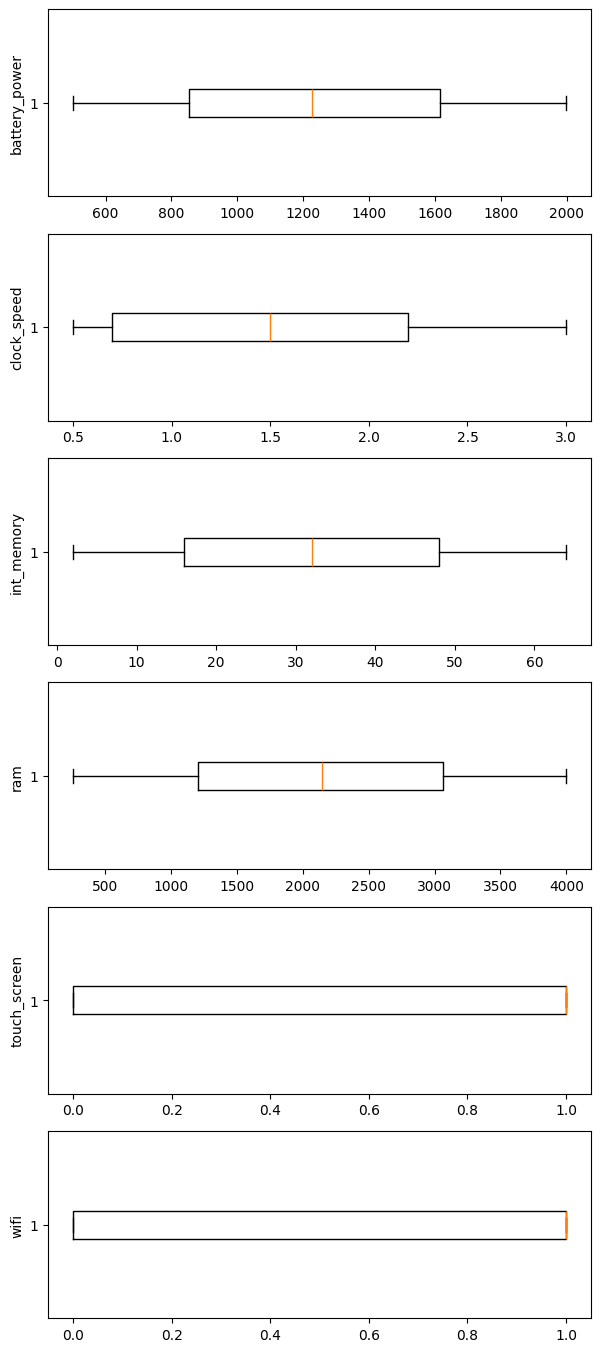

In [16]:
fig, axs=plt.subplots(6,1,figsize=(7,17))
j=0
for i in X.columns:
  axs[j].boxplot(X[i], vert=False)
  axs[j].set_ylabel(i)
  j+=1
plt.show()

In [17]:
corr=X.corr()

In [18]:
xtrain=np.array(X[0:1000])
xtest=np.array(X[1001:2000])
ytrain=np.array(Y[0:1000])
ytest=np.array(Y[1001:2000])

In [19]:
mew=xtrain.mean(axis=0)
mew0=xtrain[ytrain[:,0]==0].mean(axis=0)
mew1=xtrain[ytrain[:,0]==1].mean(axis=0)
mew2=xtrain[ytrain[:,0]==2].mean(axis=0)
mew3=xtrain[ytrain[:,0]==3].mean(axis=0)

print(mew,mew0,mew1,mew2,mew3)


[1.252499e+03 1.528900e+00 3.268900e+01 2.183429e+03 5.090000e-01
 5.230000e-01] [1.11140909e+03 1.59462810e+00 3.12768595e+01 7.77305785e+02
 5.41322314e-01 4.83471074e-01] [1.25311966e+03 1.45213675e+00 3.29487179e+01 1.66363675e+03
 5.08547009e-01 5.38461538e-01] [1.23639919e+03 1.54233871e+00 3.16209677e+01 2.60079435e+03
 4.87903226e-01 5.48387097e-01] [1.39014855e+03 1.52427536e+00 3.46666667e+01 3.48200362e+03
 5.00000000e-01 5.21739130e-01]


In [20]:
xtrain

array([[8.420e+02, 2.200e+00, 7.000e+00, 2.549e+03, 0.000e+00, 1.000e+00],
       [1.021e+03, 5.000e-01, 5.300e+01, 2.631e+03, 1.000e+00, 0.000e+00],
       [5.630e+02, 5.000e-01, 4.100e+01, 2.603e+03, 1.000e+00, 0.000e+00],
       ...,
       [1.068e+03, 5.000e-01, 1.900e+01, 1.209e+03, 1.000e+00, 0.000e+00],
       [1.373e+03, 1.900e+00, 2.900e+01, 2.752e+03, 1.000e+00, 1.000e+00],
       [1.777e+03, 3.000e+00, 2.000e+01, 3.868e+03, 1.000e+00, 1.000e+00]])

In [21]:
c=(xtrain-mew)
d=c.T*0.001

In [22]:
cov=np.dot(d,c)
invcov=np.linalg.inv(cov)

In [23]:
print(cov.shape,xtrain.shape)

(6, 6) (1000, 6)


In [24]:
p_y=np.array([1/4,1/4,1/4,1/4])

In [25]:
p_y.shape

(4,)

In [26]:
u=np.array([mew0,mew1,mew2,mew3])
u.shape
u[0]

array([1.11140909e+03, 1.59462810e+00, 3.12768595e+01, 7.77305785e+02,
       5.41322314e-01, 4.83471074e-01])

In [27]:
p_x_y=np.empty((1000,4))
for i in range(999):
  for j in range(4):

     c=np.array([np.dot(xtest[i]-u[j],invcov)])
     d=np.dot(c,(xtest[i]-u[j]).T)
     p_x_y[i][j]=np.exp(-0.5*d)*p_y[j]

<ipython-input-27-7a9121048543>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p_x_y[i][j]=np.exp(-0.5*d)*p_y[j]


In [28]:

p_x_y

array([[1.14496966e-002, 1.09772756e-002, 4.25863224e-003,
        1.28365183e-003],
       [8.06379650e-003, 7.50338310e-003, 4.15805051e-003,
        9.24346602e-004],
       [2.06423617e-002, 1.90654773e-002, 4.01749347e-003,
        6.68620716e-004],
       ...,
       [2.97679809e-002, 3.77082321e-002, 1.14951882e-002,
        3.28386230e-003],
       [4.42421066e-004, 1.82104889e-003, 7.75227271e-003,
        8.15118587e-003],
       [7.29111856e-304, 7.29111856e-304, 7.29111856e-304,
        7.29111856e-304]])

In [29]:
p_x_y


array([[1.14496966e-002, 1.09772756e-002, 4.25863224e-003,
        1.28365183e-003],
       [8.06379650e-003, 7.50338310e-003, 4.15805051e-003,
        9.24346602e-004],
       [2.06423617e-002, 1.90654773e-002, 4.01749347e-003,
        6.68620716e-004],
       ...,
       [2.97679809e-002, 3.77082321e-002, 1.14951882e-002,
        3.28386230e-003],
       [4.42421066e-004, 1.82104889e-003, 7.75227271e-003,
        8.15118587e-003],
       [7.29111856e-304, 7.29111856e-304, 7.29111856e-304,
        7.29111856e-304]])

In [30]:
final=np.argmax(p_x_y,axis=1)
final

array([0, 0, 0, 3, 3, 0, 1, 3, 1, 2, 0, 0, 1, 0, 3, 0, 2, 3, 1, 3, 3, 1,
       0, 0, 0, 0, 0, 1, 3, 2, 3, 1, 3, 1, 0, 3, 1, 0, 1, 0, 2, 1, 0, 1,
       2, 3, 2, 3, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 3, 1, 2, 1, 1, 0, 3,
       1, 0, 0, 0, 1, 2, 0, 2, 1, 0, 3, 3, 1, 2, 0, 2, 1, 2, 3, 1, 1, 1,
       2, 2, 1, 2, 0, 0, 0, 3, 1, 3, 1, 1, 1, 0, 2, 1, 0, 0, 2, 2, 3, 2,
       3, 3, 2, 3, 2, 0, 3, 2, 3, 2, 3, 3, 1, 2, 2, 1, 2, 1, 3, 3, 2, 2,
       1, 0, 2, 2, 1, 2, 0, 2, 3, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 3, 0,
       2, 3, 1, 2, 0, 2, 3, 2, 1, 2, 0, 0, 2, 1, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 0, 3, 3, 0, 0, 0, 2, 2, 2, 1, 2, 3, 0, 2, 2, 0, 1, 2, 2, 1, 0,
       3, 0, 2, 1, 3, 1, 1, 3, 0, 2, 1, 3, 0, 3, 1, 2, 1, 1, 3, 3, 0, 2,
       2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 3, 2, 1, 1, 0, 1, 3, 0, 2, 2,
       1, 0, 1, 2, 1, 1, 2, 2, 3, 3, 0, 0, 2, 3, 1, 3, 1, 0, 3, 3, 0, 2,
       2, 0, 0, 2, 3, 0, 3, 0, 2, 1, 3, 2, 0, 0, 3, 1, 3, 1, 2, 2, 3, 0,
       3, 0, 1, 0, 3, 1, 1, 0, 2, 2, 3, 2, 0, 2, 1,

In [31]:
print(ytest)

[[0]
 [0]
 [0]
 [2]
 [3]
 [0]
 [1]
 [3]
 [1]
 [2]
 [0]
 [0]
 [2]
 [0]
 [2]
 [0]
 [3]
 [3]
 [1]
 [3]
 [3]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [2]
 [2]
 [2]
 [1]
 [2]
 [0]
 [0]
 [3]
 [0]
 [1]
 [1]
 [0]
 [3]
 [2]
 [0]
 [1]
 [2]
 [3]
 [2]
 [3]
 [1]
 [1]
 [1]
 [1]
 [3]
 [1]
 [1]
 [2]
 [2]
 [1]
 [2]
 [3]
 [1]
 [2]
 [0]
 [1]
 [0]
 [3]
 [0]
 [0]
 [0]
 [0]
 [1]
 [3]
 [0]
 [1]
 [1]
 [0]
 [3]
 [3]
 [2]
 [1]
 [0]
 [1]
 [2]
 [2]
 [2]
 [1]
 [1]
 [0]
 [1]
 [2]
 [2]
 [2]
 [0]
 [0]
 [1]
 [3]
 [1]
 [3]
 [0]
 [0]
 [1]
 [0]
 [3]
 [1]
 [0]
 [0]
 [2]
 [3]
 [3]
 [1]
 [3]
 [3]
 [1]
 [3]
 [2]
 [0]
 [2]
 [2]
 [3]
 [3]
 [3]
 [3]
 [1]
 [2]
 [2]
 [1]
 [2]
 [0]
 [2]
 [3]
 [2]
 [2]
 [1]
 [0]
 [1]
 [1]
 [0]
 [2]
 [0]
 [2]
 [2]
 [2]
 [2]
 [1]
 [2]
 [2]
 [0]
 [1]
 [1]
 [2]
 [1]
 [1]
 [3]
 [0]
 [1]
 [3]
 [0]
 [2]
 [0]
 [2]
 [2]
 [2]
 [2]
 [2]
 [0]
 [0]
 [2]
 [1]
 [2]
 [0]
 [3]
 [1]
 [3]
 [2]
 [2]
 [3]
 [2]
 [0]
 [3]
 [3]
 [1]
 [0]
 [0]
 [3]
 [2]
 [2]
 [0]
 [3]
 [2]
 [0]
 [3]
 [2]
 [0]
 [1]
 [2]
 [2]
 [1]
 [0]
 [2]
 [0]


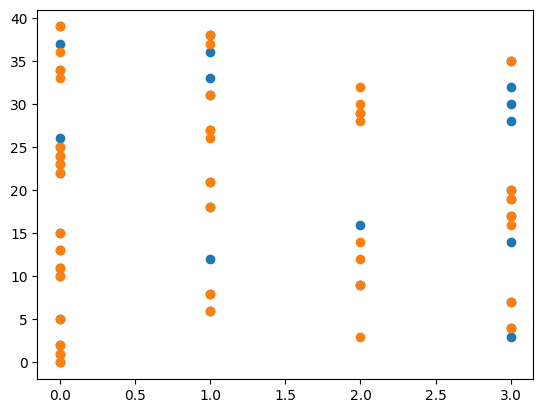

In [32]:
g=[i for i in range(40)]
plt.scatter(final[0:40],g)
plt.scatter(ytest[0:40],g)

In [33]:
count=0
for i in range(999):
  if(ytest[i]==final[i]):
    count+=1
print(count/999)

0.7177177177177178
